Projekt MNwS - Aleksander Folfas 411052

In [5]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

Zadanie 18

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście istotności współczynnika korelacji w przypadku, gdy dane pochodzą z rozkładu
normalnego o różnych parametrach. W trakcie symulowania danych należy pamiętać, by dane
spełniały hipotezę główną. Porównać uzyskane wyniki dla wsp. korelacji Pearsona i Spearmana.
Uzyskane wyniki należy opisać w zależności od:
- liczby danych,
- parametrów rozkładów.


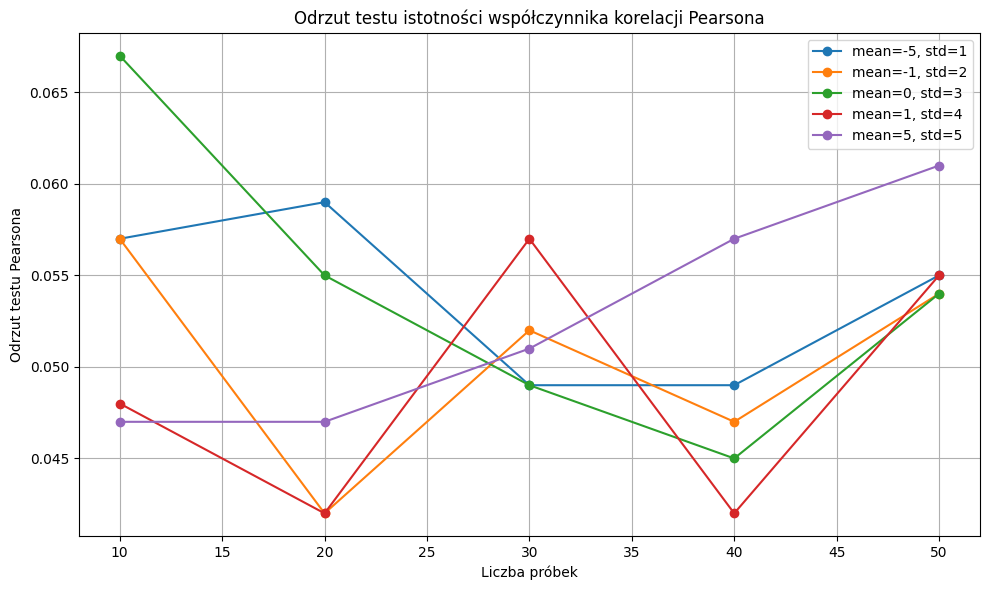

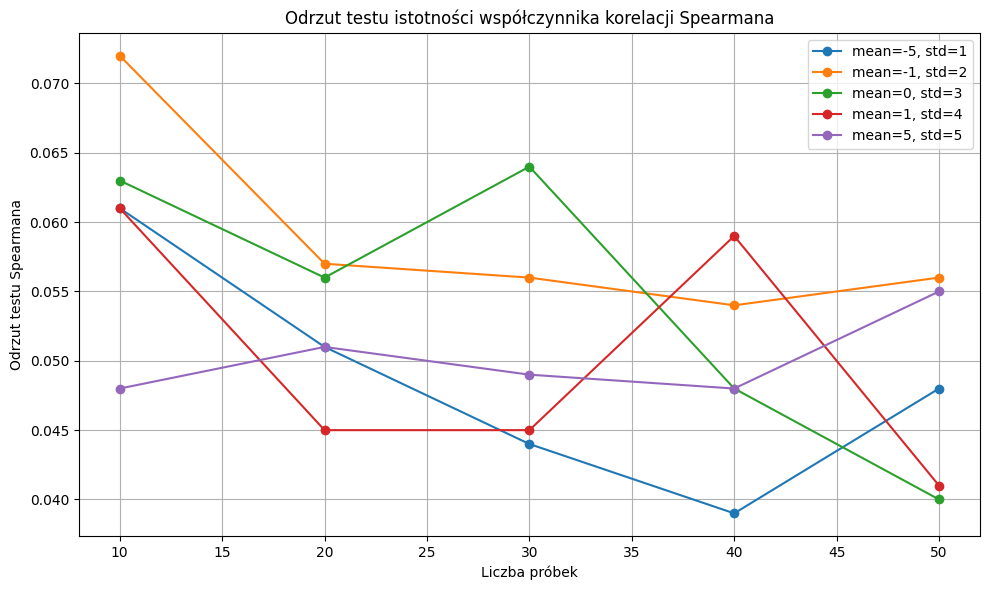

In [6]:
def rejection_rate_correlation(n_samples, mean, std, n_simulations=1000):
    pearson_rejections = 0
    spearman_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych z rozkładu normalnego
        group1 = np.random.normal(mean, std, size=n_samples)
        group2 = np.random.normal(mean, std, size=n_samples)

        # Test istotności współczynnika korelacji Pearsona
        pearson_r, pearson_pvalue = stats.pearsonr(group1, group2)
        if pearson_pvalue < 0.05:
            pearson_rejections += 1

        # Test istotności współczynnika korelacji Spearmana
        spearman_rho, spearman_pvalue = stats.spearmanr(group1, group2)
        if spearman_pvalue < 0.05:
            spearman_rejections += 1

    pearson_rejection_rate = pearson_rejections / n_simulations
    spearman_rejection_rate = spearman_rejections / n_simulations

    return pearson_rejection_rate, spearman_rejection_rate

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
mean_range = [-5, -1, 0, 1, 5]
std_range = [1, 2, 3, 4, 5]
np.random.seed(411052)

pearson_rejection_rates = np.zeros((len(n_samples_range), len(mean_range), len(std_range)))
spearman_rejection_rates = np.zeros((len(n_samples_range), len(mean_range), len(std_range)))

# Symulacje dla różnych wartości liczby danych i parametrów rozkładów normalnych
for i, n_samples in enumerate(n_samples_range):
    for j, (mean, std) in enumerate(zip(mean_range, std_range)):
        pearson_rejection_rate, spearman_rejection_rate = rejection_rate_correlation(n_samples, mean, std)
        pearson_rejection_rates[i, j] = pearson_rejection_rate
        spearman_rejection_rates[i, j] = spearman_rejection_rate

# Generowanie wykresów dla testu istotności współczynnika korelacji Pearsona
plt.figure(figsize=(10, 6))
for j, (mean, std) in enumerate(zip(mean_range, std_range)):
    pearson_rejection_rates = []
    for n_samples in n_samples_range:
        pearson_rejection_rate, _ = rejection_rate_correlation(n_samples, mean, std)
        pearson_rejection_rates.append(pearson_rejection_rate)
    plt.plot(n_samples_range, pearson_rejection_rates, '-o', label=f'mean={mean}, std={std}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Pearsona')
plt.title('Odrzut testu istotności współczynnika korelacji Pearsona')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generowanie wykresów dla testu istotności współczynnika korelacji Spearmana
plt.figure(figsize=(10, 6))
for j, (mean, std) in enumerate(zip(mean_range, std_range)):
    spearman_rejection_rates = []
    for n_samples in n_samples_range:
        _, spearman_rejection_rate = rejection_rate_correlation(n_samples, mean, std)
        spearman_rejection_rates.append(spearman_rejection_rate)
    plt.plot(n_samples_range, spearman_rejection_rates, '-o', label=f'mean={mean}, std={std}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Spearmana')
plt.title('Odrzut testu istotności współczynnika korelacji Spearmana')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()